# Breast Cancer Classification

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
data = cancer.data

In [6]:
data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
df = pd.DataFrame(data = data, columns = cancer.feature_names)

In [8]:
df.insert(loc = 0, column = 'diagnosis', value = cancer.target)

In [9]:
df.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df.shape

(569, 31)

In [11]:
df.isna().sum() # count the number of null values

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

In [13]:
# count of Malignant(0) or Benign cells(1)

df.diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

**212 - Malignant, 357 - Benign**

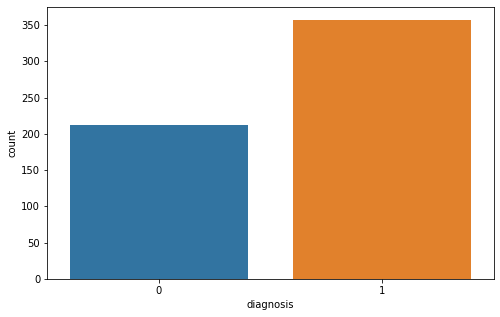

In [14]:
# visualization of count of Malignant(0) or Benign cells(1)

plt.figure(figsize = (8, 5))
sns.countplot(df.diagnosis)
plt.show()

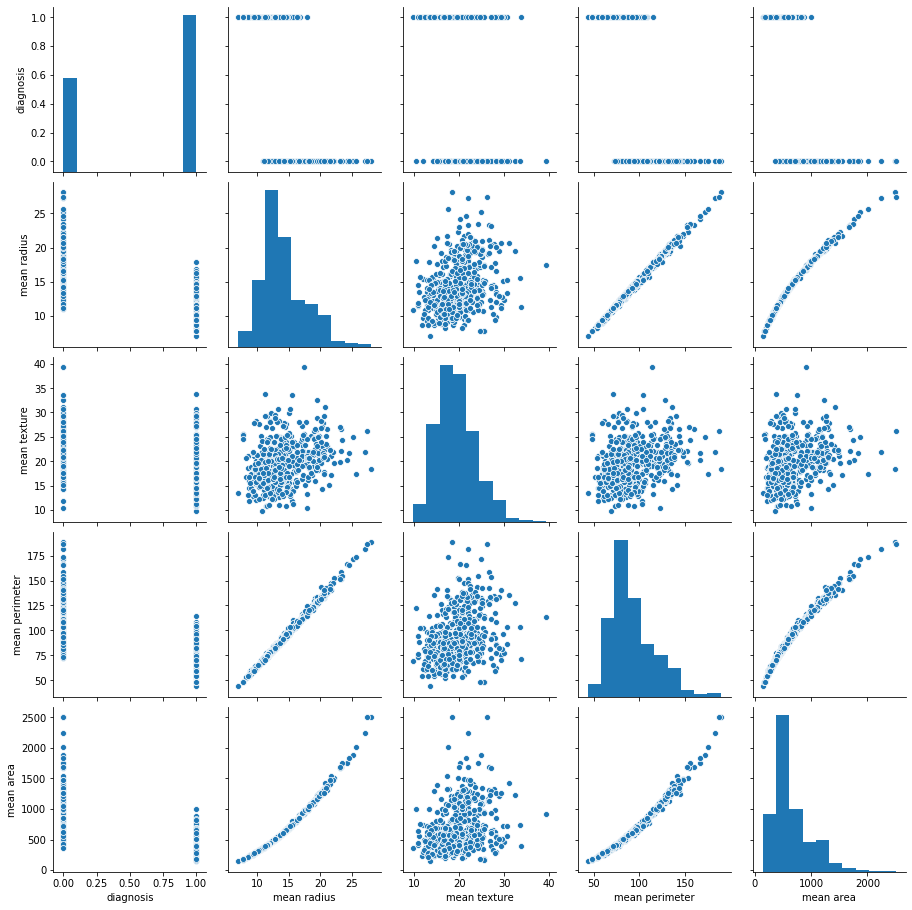

In [15]:
# Creating a pairplot

sns.pairplot(df.iloc[:, 0:5])
plt.show()

In [16]:
# getting the correlation of the columns
df.iloc[:, 0:11].corr()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,0.012838
mean radius,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
mean texture,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
mean perimeter,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
mean area,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
mean smoothness,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
mean compactness,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
mean concavity,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
mean concave points,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
mean symmetry,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


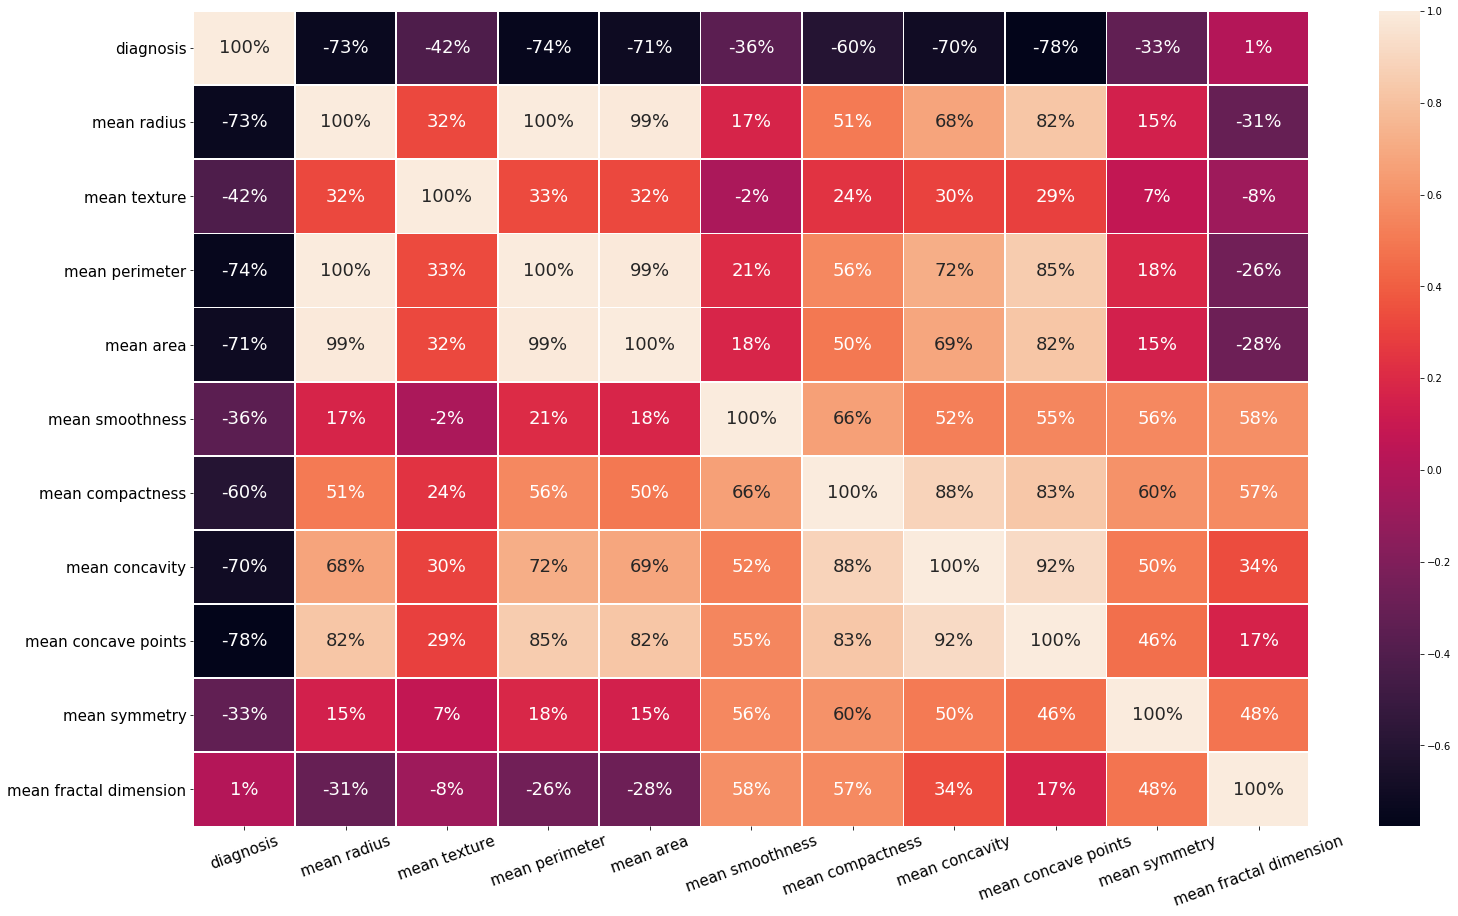

In [17]:
# Heatmap of correlation of columns

fig, ax = plt.subplots(figsize = (25, 15))
sns.heatmap(df.iloc[:, 0:11].corr(), annot = True, fmt = '.0%', linewidths = 0.8, linecolor = 'white', annot_kws = {'size': 18})
plt.xticks(fontsize = 15, rotation = 20)
plt.yticks(fontsize = 15)
plt.show()

In [18]:
# Split the dataset into independent (X) and dependent (y) data sets.
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [19]:
X[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [20]:
y[:5]

array([0, 0, 0, 0, 0])

In [21]:
# Split the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [22]:
X_train.shape, y_train.shape

((426, 30), (426,))

In [23]:
X_test.shape, y_test.shape

((143, 30), (143,))

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
# Creating a function for machine learning models
def models(X_train, y_train):
    
    # KNN 
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train, y_train)
    
    # Logistic Regression 
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression()
    log.fit(X_train, y_train)
    
    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy')
    tree.fit(X_train, y_train)
    
    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = "entropy")
    forest.fit(X_train, y_train)
    
    # SVM
    from sklearn.svm import SVC
    svc = SVC(kernel = 'rbf')
    svc.fit(X_train, y_train)
    
    # Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    naive = GaussianNB()
    naive.fit(X_train, y_train)
    
    # Model accuracy on the training data
    print("[0] K-Nearest Neighbors Training Accuracy:", knn.score(X_train, y_train))
    print("[1] Logistic Regression Training Accuracy:", log.score(X_train, y_train))
    print("[2] Decision Tree Classifier Training Accuracy:", tree.score(X_train, y_train))
    print("[3] Random Forest Classifier Training Accuracy:", forest.score(X_train, y_train))
    print("[4] Support Vector Machine Training Accuracy:", svc.score(X_train, y_train))
    print("[5] Naive Bayes Training Accuracy:", naive.score(X_train, y_train))
    
    return knn, log, tree, forest, svc, naive

In [30]:
# Getting all the models
model = models(X_train, y_train)

[0] K-Nearest Neighbors Training Accuracy: 0.9741784037558685
[1] Logistic Regression Training Accuracy: 0.9906103286384976
[2] Decision Tree Classifier Training Accuracy: 1.0
[3] Random Forest Classifier Training Accuracy: 1.0
[4] Support Vector Machine Training Accuracy: 0.9859154929577465
[5] Naive Bayes Training Accuracy: 0.9483568075117371


In [57]:
# accuracy score, confusion matrix and classification report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
for i in range(len(model)):
    print('Model ', i)
    cm = confusion_matrix(y_test, model[i].predict(X_test))   
    cr = classification_report(y_test, model[i].predict(X_test))
    print('Confusion Matrix: \n', cm)
    print()
    print('Classification Report : \n', cr)
    print('Accuracy Score', accuracy_score(y_test, model[i].predict(X_test)))
    print()

Model  0
Confusion Matrix: 
 [[47  6]
 [ 1 89]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.89      0.93        53
           1       0.94      0.99      0.96        90

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

Accuracy Score 0.951048951048951

Model  1
Confusion Matrix: 
 [[50  3]
 [ 3 87]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.97      0.97      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Accuracy Score 0.958041958041958

Model  2
Confusion Matrix: 
 [[51  2]
 [ 5 85]]

Classification Report : 
               precision    recall  f1-score   support

**So we can say that Random Forest model gives best results.**

In [64]:
# Printing predictions using Random Forest model
pred = model[3].predict(X_test)
print(pred)

[0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


In [66]:
# comparing predicted results with actual values
data = {'Actual Data': y_test, 'Predicted Data': pred}
df = pd.DataFrame(data)
df.head(15)

,Actual Data,Predicted Data
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1
